# PROJET 9 : Produisez une √©tude de march√© avec R ou Python

![La Poule qui Chante](LAPOULEQUICHANTE.png)

## ETAPE 1: Importation des librairies et chargement des fichiers 

In [1]:
#Importations des librairies

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as stats
from scipy.stats import shapiro


import seaborn as sns
sns.set()

In [2]:
#Importation du fichier Disponibilite_Alimentaire_2017
Disponibilite_Alimentaire_2017 = pd.read_csv('Disponibilite_Alimentaire_2017.csv', sep=',')
#Importation du fichier Population_2000_2018
Population_2000_2018 = pd.read_csv('Population_2000_2018.csv', sep=',')
#Importation du fichier data_PIB_par_habitant_2017
Data_PIB_par_habitant_2017 = pd.read_csv('data_PIB_par_habitant_2017.csv', sep=',')
#Importation du fichier Stabilite_politique_2017
Stabilite_politique_2017 = pd.read_csv('Stabilite_politique_2017.csv', sep=',')

## ETAPE 2: Nettoyage et exploration des donn√©es

### 2.1) Exploration du Fichier Disponibilite_Alimentaire_2017

In [3]:
Disponibilite_Alimentaire_2017.head()

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code √âl√©ment                   √âl√©ment  Code Produit          Produit  \
0          5511                Production          2511  Bl√© et produits   
1          5611   Importations - Quantit√©          2511  Bl√© et produits   
2          5072        Variation de stock          2511  Bl√© et produits   
3          5911   Exportations - Quantit√©          2511  Bl√© et produits   
4          5301  Disponibilit√© int√©rieure          2511  Bl√© et produits   

   Code ann√©e  Ann√©e               Unit√©  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Donn√©es standardis√©es  
1  Donn√©es standardis√©es  
2  Donn√©es standardis√©es  
3  Donn√©es standardis√©es  
4  Donn√©es standardis√©es

La table fournit diverses informations sur chaque produit alimentaire par pays, notamment sa disponibilit√©, ainsi que les quantit√©s export√©es et import√©es. Nous allons nous focaliser sur la viande de volaille. Ensuite, nous nous int√©resserons √† la colonne "√©l√©ments", qui regroupe les indicateurs pertinents, et nous la transformerons en pivot pour une meilleure analyse.









In [4]:
# Filtrer le dataframe sur la cat√©gorie "viande de volailles"
Disponibilite_Alimentaire_2017 = Disponibilite_Alimentaire_2017.loc[Disponibilite_Alimentaire_2017['Produit'] == 'Viande de Volailles']
Disponibilite_Alimentaire_2017.head()

Code Domaine                      Domaine  Code zone         Zone  \
651          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
652          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
653          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
654          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
655          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

     Code √âl√©ment                   √âl√©ment  Code Produit  \
651          5511                Production          2734   
652          5611   Importations - Quantit√©          2734   
653          5072        Variation de stock          2734   
654          5301  Disponibilit√© int√©rieure          2734   
655          5123                    Pertes          2734   

                 Produit  Code ann√©e  Ann√©e               Unit√©  Valeur  \
651  Viande de Volailles        2017   2017  Milliers de tonnes    28.0   
652  Viande de Volailles        2017   2017  Milliers de tonnes    29.0   
653  Viande de Volailles        2017   2017  Milliers de tonnes     0.0   
654  Viande de Volailles        2017   2017  Milliers de tonnes    57.0   
655  Viande de Volailles        2017   2017  Milliers de tonnes     2.0   

    Symbole Description du Symbole  
651       S  Donn√©es standardis√©es  
652       S  Donn√©es standardis√©es  
653       S  Donn√©es standardis√©es  
654       S  Donn√©es standardis√©es  
655       S  Donn√©es standardis√©es

In [5]:
# Pivot de la table sur la colonne √©l√©ment 
Disponibilite_Alimentaire_2017 = Disponibilite_Alimentaire_2017.pivot_table(index = ['Zone'], columns = '√âl√©ment', values = 'Valeur', aggfunc = 'sum')
Disponibilite_Alimentaire_2017

√âl√©ment                Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                        
Afghanistan                                    NaN                    NaN   
Afrique du Sud                                 0.0                    NaN   
Albanie                                        NaN                    NaN   
Alg√©rie                                        0.0                    NaN   
Allemagne                                      NaN                    NaN   
...                                            ...                    ...   
√âmirats arabes unis                            NaN                    NaN   
√âquateur                                       0.0                    NaN   
√âtats-Unis d'Am√©rique                          NaN                    NaN   
√âthiopie                                       0.0                    NaN   
√éles Salomon                                   0.0                    NaN   

√âl√©ment                Autres utilisations (non alimentaire)  \
Zone                                                           
Afghanistan                                              NaN   
Afrique du Sud                                           NaN   
Albanie                                                  NaN   
Alg√©rie                                                  NaN   
Allemagne                                                NaN   
...                                                      ...   
√âmirats arabes unis                                      NaN   
√âquateur                                                 NaN   
√âtats-Unis d'Am√©rique                                   89.0   
√âthiopie                                                 NaN   
√éles Salomon                                             NaN   

√âl√©ment                Disponibilit√© alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Alg√©rie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
√âmirats arabes unis                                             147.0   
√âquateur                                                         83.0   
√âtats-Unis d'Am√©rique                                           219.0   
√âthiopie                                                          0.0   
√éles Salomon                                                     18.0   

√âl√©ment                Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Alg√©rie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
√âmirats arabes unis                                                43.47        
√âquateur                                                           19.31        
√âtats-Unis d'Am√©rique                                              55.68        
√âthiopie                                                            0.13        
√éles Salomon                                                        4.45        

√âl√©ment                Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
Zone                         

### 2.2) Exploration du Fichier Population_2000_2018

In [6]:
Population_2000_2018.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  S√©ries temporelles annuelles          2  Afghanistan   
1           OA  S√©ries temporelles annuelles          2  Afghanistan   
2           OA  S√©ries temporelles annuelles          2  Afghanistan   
3           OA  S√©ries temporelles annuelles          2  Afghanistan   
4           OA  S√©ries temporelles annuelles          2  Afghanistan   

   Code √âl√©ment            √âl√©ment  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code ann√©e  Ann√©e           Unit√©     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales s√ªres  NaN  
1  Sources internationales s√ªres  NaN  
2  Sources internationales s√ªres  NaN  
3  Sources internationales s√ªres  NaN  
4  Sources internationales s√ªres  NaN

In [7]:
# Filtrer les donn√©es sur l'ann√©e 2017
Population_2017 = Population_2000_2018.loc[Population_2000_2018['Ann√©e'] == 2017]
Population_2017.head()

Code Domaine                       Domaine  Code zone            Zone  \
17           OA  S√©ries temporelles annuelles          2     Afghanistan   
36           OA  S√©ries temporelles annuelles        202  Afrique du Sud   
55           OA  S√©ries temporelles annuelles          3         Albanie   
74           OA  S√©ries temporelles annuelles          4         Alg√©rie   
93           OA  S√©ries temporelles annuelles         79       Allemagne   

    Code √âl√©ment            √âl√©ment  Code Produit                 Produit  \
17           511  Population totale          3010  Population-Estimations   
36           511  Population totale          3010  Population-Estimations   
55           511  Population totale          3010  Population-Estimations   
74           511  Population totale          3010  Population-Estimations   
93           511  Population totale          3010  Population-Estimations   

    Code ann√©e  Ann√©e           Unit√©     Valeur Symbole  \
17        2017   2017  1000 personnes  36296.113       X   
36        2017   2017  1000 personnes  57009.756       X   
55        2017   2017  1000 personnes   2884.169       X   
74        2017   2017  1000 personnes  41389.189       X   
93        2017   2017  1000 personnes  82658.409       X   

           Description du Symbole Note  
17  Sources internationales s√ªres  NaN  
36  Sources internationales s√ªres  NaN  
55  Sources internationales s√ªres  NaN  
74  Sources internationales s√ªres  NaN  
93  Sources internationales s√ªres  NaN

In [8]:
# Conservation uniquement des colonnes Zone et Valeur
Population_2017 = Population_2017.loc[:,['Zone','Valeur',]]
Population_2017

Zone     Valeur
17                               Afghanistan  36296.113
36                            Afrique du Sud  57009.756
55                                   Albanie   2884.169
74                                   Alg√©rie  41389.189
93                                 Allemagne  82658.409
...                                      ...        ...
4333  Venezuela (R√©publique bolivarienne du)  29402.484
4352                                Viet Nam  94600.648
4371                                   Y√©men  27834.819
4390                                  Zambie  16853.599
4409                                Zimbabwe  14236.595

[236 rows x 2 columns]

In [9]:
# Renommer la colonne Valeur en Population
Population_2017 = Population_2017.rename(columns={'Valeur': 'Population'})

# Multiplication de la population par 1000 (mise √† l'echelle r√©elle)
Population_2017['Population'] = Population_2017['Population'] * 1000

Population_2017.head()

Zone  Population
17     Afghanistan  36296113.0
36  Afrique du Sud  57009756.0
55         Albanie   2884169.0
74         Alg√©rie  41389189.0
93       Allemagne  82658409.0

### 2.3) Exploration du Fichier Data_PIB_par_habitant_2017

In [10]:
Data_PIB_par_habitant_2017.head()

Code Domaine                             Domaine  Code zone (M49)  \
0           FS  Donn√©es de la s√©curit√© alimentaire                4   
1           FS  Donn√©es de la s√©curit√© alimentaire              710   
2           FS  Donn√©es de la s√©curit√© alimentaire                8   
3           FS  Donn√©es de la s√©curit√© alimentaire               12   
4           FS  Donn√©es de la s√©curit√© alimentaire              276   

             Zone  Code √âl√©ment √âl√©ment  Code Produit  \
0     Afghanistan          6126  Valeur         22013   
1  Afrique du Sud          6126  Valeur         22013   
2         Albanie          6126  Valeur         22013   
3         Alg√©rie          6126  Valeur         22013   
4       Allemagne          6126  Valeur         22013   

                                             Produit  Code ann√©e  Ann√©e  \
0  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
1  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
2  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
3  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
4  PIB par habitant, ($ PPA internationaux consta...        2017   2017   

      Unit√©   Valeur Symbole             Description du Symbole  Note  
0  Int$/cap   2956.8       X  Ciffre de sources internationales   NaN  
1  Int$/cap  14823.6       X  Ciffre de sources internationales   NaN  
2  Int$/cap  14229.3       X  Ciffre de sources internationales   NaN  
3  Int$/cap  13805.4       X  Ciffre de sources internationales   NaN  
4  Int$/cap  61563.6       X  Ciffre de sources internationales   NaN

In [11]:
# Conservation uniquement des colonnes Zone et Valeur
Data_PIB_par_habitant_2017 = Data_PIB_par_habitant_2017.loc[:,['Zone','Valeur']]
Data_PIB_par_habitant_2017

Zone   Valeur
0       Afghanistan   2956.8
1    Afrique du Sud  14823.6
2           Albanie  14229.3
3           Alg√©rie  13805.4
4         Allemagne  61563.6
..              ...      ...
185         Uruguay  29662.1
186         Vanuatu   3344.9
187        Viet Nam  10405.4
188          Zambie   3642.4
189        Zimbabwe   3611.8

[190 rows x 2 columns]

In [12]:
# Renommer la colonne valeur en PIB_par_habitant
Data_PIB_par_habitant_2017.rename(columns = {'Valeur': 'PIB_par_habitant'}, inplace=True)
Data_PIB_par_habitant_2017.head()

Zone  PIB_par_habitant
0     Afghanistan            2956.8
1  Afrique du Sud           14823.6
2         Albanie           14229.3
3         Alg√©rie           13805.4
4       Allemagne           61563.6

### 2.4) Exploration du Fichier Stabilite_politique_2017

In [13]:
Stabilite_politique_2017.head()

Code Domaine                             Domaine  Code zone (M49)  \
0           FS  Donn√©es de la s√©curit√© alimentaire                4   
1           FS  Donn√©es de la s√©curit√© alimentaire              710   
2           FS  Donn√©es de la s√©curit√© alimentaire                8   
3           FS  Donn√©es de la s√©curit√© alimentaire               12   
4           FS  Donn√©es de la s√©curit√© alimentaire              276   

             Zone  Code √âl√©ment √âl√©ment  Code Produit  \
0     Afghanistan          6125  Valeur         21032   
1  Afrique du Sud          6125  Valeur         21032   
2         Albanie          6125  Valeur         21032   
3         Alg√©rie          6125  Valeur         21032   
4       Allemagne          6125  Valeur         21032   

                                             Produit  Code ann√©e  Ann√©e  \
0  Stabilit√© politique et absence de violence/ter...        2017   2017   
1  Stabilit√© politique et absence de violence/ter...        2017   2017   
2  Stabilit√© politique et absence de violence/ter...        2017   2017   
3  Stabilit√© politique et absence de violence/ter...        2017   2017   
4  Stabilit√© politique et absence de violence/ter...        2017   2017   

   Unit√©  Valeur Symbole             Description du Symbole  Note  
0    NaN   -2.79       X  Ciffre de sources internationales   NaN  
1    NaN   -0.28       X  Ciffre de sources internationales   NaN  
2    NaN    0.37       X  Ciffre de sources internationales   NaN  
3    NaN   -0.92       X  Ciffre de sources internationales   NaN  
4    NaN    0.57       X  Ciffre de sources internationales   NaN

In [14]:
# Conservation uniquement des colonnes Zone et Valeur

Stabilite_politique_2017 = Stabilite_politique_2017[
    Stabilite_politique_2017['Produit'] == "Stabilit√© politique et absence de violence/terrorisme (indice)"
][['Zone', 'Valeur']]

# Renommer la colonne valeur par Stabilite politique 
Stabilite_politique_2017.rename(columns = {'Valeur': 'Stabilite politique'}, inplace=True)
Stabilite_politique_2017.head()

Zone  Stabilite politique
0     Afghanistan                -2.79
1  Afrique du Sud                -0.28
2         Albanie                 0.37
3         Alg√©rie                -0.92
4       Allemagne                 0.57

## ETAPE 3:  Jointures des 4 fichiers

In [15]:
# Jointure entre les tables Disponibilite_Alimentaire_2017 et Population_2017
La_poule_qui_chante = Disponibilite_Alimentaire_2017.merge(Population_2017, on='Zone', how='left')

# Jointure entre les tables La_poule_qui_chante et Data_PIB_par_habitant_2017
La_poule_qui_chante = La_poule_qui_chante.merge(Data_PIB_par_habitant_2017, on='Zone', how='left')

# Jointure entre les tables Stabilite_politique_2017 avec le reste jointure gauche
La_poule_qui_chante = La_poule_qui_chante.merge(Stabilite_politique_2017, on='Zone', how='left')

La_poule_qui_chante.head()

Zone  Alimentation pour touristes  Aliments pour animaux  \
0     Afghanistan                          NaN                    NaN   
1  Afrique du Sud                          0.0                    NaN   
2         Albanie                          NaN                    NaN   
3         Alg√©rie                          0.0                    NaN   
4       Allemagne                          NaN                    NaN   

   Autres utilisations (non alimentaire)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Disponibilit√© alimentaire (Kcal/personne/jour)  \
0                                             5.0   
1                                           143.0   
2                                            85.0   
3                                            22.0   
4                                            71.0   

   Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
0                                               0.33               
1                                               9.25               
2                                               6.45               
3                                               1.50               
4                                               4.16               

   Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilit√© int√©rieure  Exportations - Quantit√©  ...  Nourriture  Pertes  \
0                      57.0                      NaN  ...        55.0     2.0   
1                    2118.0                     63.0  ...      2035.0    83.0   
2                      47.0                      0.0  ...        47.0     NaN   
3                     277.0                      0.0  ...       264.0    13.0   
4                    1739.0                    646.0  ...      1609.0     NaN   

   Production  R√©sidus  Semences  Traitement  Variation de stock  Population  \
0        28.0      0.0       NaN         NaN                 0.0  36296113.0   
1      1667.0      0.0       NaN         NaN                 0.0  57009756.0   
2        13.0      0.0       NaN         NaN                 4.0   2884169.0   
3       275.0      0.0       NaN         NaN                 0.0  41389189.0   
4      1514.0    -38.0       NaN       167.0               -29.0  82658409.0   

   PIB_par_habitant  Stabilite politique  
0            2956.8                -2.79  
1           14823.6                -0.28  
2           14229.3                 0.37  
3           13805.4                -0.92  
4           61563.6                 0.57  

[5 rows x 21 columns]

### 3.1) Nettoyage et v√©rifications du dataframe final

In [16]:
# Suppression de l'index num√©rique pour le remplacer par les pays

La_poule_qui_chante = La_poule_qui_chante.set_index('Zone')

La_poule_qui_chante

Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                        
Afghanistan                                    NaN                    NaN   
Afrique du Sud                                 0.0                    NaN   
Albanie                                        NaN                    NaN   
Alg√©rie                                        0.0                    NaN   
Allemagne                                      NaN                    NaN   
...                                            ...                    ...   
√âmirats arabes unis                            NaN                    NaN   
√âquateur                                       0.0                    NaN   
√âtats-Unis d'Am√©rique                          NaN                    NaN   
√âthiopie                                       0.0                    NaN   
√éles Salomon                                   0.0                    NaN   

                       Autres utilisations (non alimentaire)  \
Zone                                                           
Afghanistan                                              NaN   
Afrique du Sud                                           NaN   
Albanie                                                  NaN   
Alg√©rie                                                  NaN   
Allemagne                                                NaN   
...                                                      ...   
√âmirats arabes unis                                      NaN   
√âquateur                                                 NaN   
√âtats-Unis d'Am√©rique                                   89.0   
√âthiopie                                                 NaN   
√éles Salomon                                             NaN   

                       Disponibilit√© alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Alg√©rie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
√âmirats arabes unis                                             147.0   
√âquateur                                                         83.0   
√âtats-Unis d'Am√©rique                                           219.0   
√âthiopie                                                          0.0   
√éles Salomon                                                     18.0   

                       Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Alg√©rie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
√âmirats arabes unis                                                43.47        
√âquateur                                                           19.31        
√âtats-Unis d'Am√©rique                                              55.68        
√âthiopie                                                            0.13        
√éles Salomon                                                        4.45        

                       Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
Zone                                                          

In [17]:
# Suppression des variables ne comportant pratiquement aucune valeur ou n'ayant pas d'int√©r√™t pour l'analyse (la viande de volaille n'√©tant pas utilis√©e pour cela)
# Suppression √©galement des variables qui sont trop identiques (exemple : Disponibilit√© alimentaire en quantit√© (kg/personne/an), Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour), Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)        

La_poule_qui_chante = La_poule_qui_chante.drop(columns = ['Aliments pour animaux','Alimentation pour touristes','R√©sidus','Variation de stock',
                        'Autres utilisations (non alimentaire)','Semences','Traitement','Pertes',
                        'Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)',
                        'Disponibilit√© alimentaire (Kcal/personne/jour)',
                        'Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)','Nourriture'])

La_poule_qui_chante


Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Alg√©rie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
√âmirats arabes unis                                                43.47        
√âquateur                                                           19.31        
√âtats-Unis d'Am√©rique                                              55.68        
√âthiopie                                                            0.13        
√éles Salomon                                                        4.45        

                       Disponibilit√© int√©rieure  Exportations - Quantit√©  \
Zone                                                                       
Afghanistan                                57.0                      NaN   
Afrique du Sud                           2118.0                     63.0   
Albanie                                    47.0                      0.0   
Alg√©rie                                   277.0                      0.0   
Allemagne                                1739.0                    646.0   
...                                         ...                      ...   
√âmirats arabes unis                       412.0                     94.0   
√âquateur                                  341.0                      0.0   
√âtats-Unis d'Am√©rique                   18266.0                   3692.0   
√âthiopie                                   14.0                      NaN   
√éles Salomon                                3.0                      0.0   

                       Importations - Quantit√©  Production   Population  \
Zone                                                                      
Afghanistan                               29.0        28.0   36296113.0   
Afrique du Sud                           514.0      1667.0   57009756.0   
Albanie                                   38.0        13.0    2884169.0   
Alg√©rie                                    2.0       275.0   41389189.0   
Allemagne                                842.0      1514.0   82658409.0   
...                                        ...         ...          ...   
√âmirats arabes unis                      433.0        48.0    9487203.0   
√âquateur                                   0.0       340.0   16785361.0   
√âtats-Unis d'Am√©rique                    123.0     21914.0  325084756.0   
√âthiopie                                   1.0        14.0  106399924.0   
√éles Salomon                               6.0         0.0     636039.0   

                       PIB_par_habitant  Stabilite politique  
Zone                                                          
Afghanistan                      2956.8                -2.79  
Afrique du Sud                  14823.6                -0.28  
Albanie                         14229.3                 0.37  
Alg√©rie                         13805.4                -0.92  
Allemagne                       61563.6                 0.57  
...                                 ...                  ...  
√âmirats arabes unis             70048.5                 0.60  
√âquateur                        14552.4                -0.08  
√âtats-Unis d'Am√©rique           66105.7                 0.26  
√âthiopie                         2253.0                -1.68  
√éles Salomon                     2896.7                 0.19  

[172 rows x 8 columns]

In [18]:
# Remplacements des valeurs manquantes par la valeur moyenne de chaque colonne.

La_poule_qui_chante = La_poule_qui_chante.fillna(La_poule_qui_chante.mean())
La_poule_qui_chante.isna().mean()

Disponibilit√© alimentaire en quantit√© (kg/personne/an)    0.0
Disponibilit√© int√©rieure                                  0.0
Exportations - Quantit√©                                   0.0
Importations - Quantit√©                                   0.0
Production                                                0.0
Population                                                0.0
PIB_par_habitant                                          0.0
Stabilite politique                                       0.0
dtype: float64

In [19]:
# Y a t-il des doublons ?

La_poule_qui_chante.duplicated().sum()

0

In [20]:
# Combien y a t'il de valeurs diff√©rentes par colonne ?

La_poule_qui_chante.nunique()

Disponibilit√© alimentaire en quantit√© (kg/personne/an)    169
Disponibilit√© int√©rieure                                  136
Exportations - Quantit√©                                    51
Importations - Quantit√©                                    85
Production                                                126
Population                                                172
PIB_par_habitant                                          164
Stabilite politique                                       132
dtype: int64

In [21]:
La_poule_qui_chante.describe(include='all')

Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
count                                         172.000000        
mean                                           20.213372        
std                                            15.860311        
min                                             0.130000        
25%                                             6.440000        
50%                                            18.090000        
75%                                            30.037500        
max                                            72.310000        

       Disponibilit√© int√©rieure  Exportations - Quantit√©  \
count                172.000000               172.000000   
mean                 687.594118               132.185185   
std                 2174.356574               454.815536   
min                    2.000000                 0.000000   
25%                   31.500000                 0.000000   
50%                  105.000000                 8.500000   
75%                  376.500000               132.185185   
max                18266.000000              4223.000000   

       Importations - Quantit√©    Production    Population  PIB_par_habitant  \
count               172.000000    172.000000  1.720000e+02        172.000000   
mean                 89.529412    725.190476  4.284175e+07      23164.362577   
std                 185.575135   2472.027193  1.530637e+08      22771.333103   
min                   0.000000      0.000000  5.204500e+04       1059.000000   
25%                   3.000000     14.750000  2.874480e+06       6006.175000   
50%                  16.000000     74.500000  9.757833e+06      15985.000000   
75%                  85.250000    503.000000  3.013874e+07      32184.725000   
max                1069.000000  21914.000000  1.421022e+09     135547.000000   

       Stabilite politique  
count           172.000000  
mean             -0.081796  
std               0.879731  
min              -2.930000  
25%              -0.630000  
50%              -0.050000  
75%               0.605000  
max               1.560000

## ETAPE 4 : Analyse exploratoire des donn√©es

# Description des indicateurs

Avant de d√©buter l‚Äôanalyse, il est essentiel de d√©crire chaque indicateur et de comprendre son utilit√© dans notre √©tude.

- **Zone** : D√©signe le pays √©tudi√©.

- **Disponibilit√© alimentaire en quantit√© (kg/personne/an)** : Quantit√© moyenne de viande de volaille disponible par habitant chaque ann√©e. Une valeur √©lev√©e peut sugg√©rer une autosuffisance alimentaire.

- **Disponibilit√© int√©rieure (en milliers de tonnes)** : Quantit√© totale de viande de volaille disponible dans le pays. Un pays avec une forte disponibilit√© est plus autonome et moins d√©pendant des importations.

- **Exportations - Quantit√© (en milliers de tonnes)** : Volume de viande de volaille export√© par le pays. Un niveau √©lev√© indique une production exc√©dentaire et une moindre d√©pendance aux importations.

- **Importations - Quantit√© (en milliers de tonnes)** : Volume de viande de volaille import√©. Une valeur √©lev√©e sugg√®re une demande interne sup√©rieure √† la production locale.

- **Production (en milliers de tonnes)** : Quantit√© totale de viande de volaille produite dans le pays. Une production faible peut signifier un besoin accru d‚Äôimportations.

- **Population** : Nombre d‚Äôhabitants du pays. Une population plus importante implique une demande potentielle plus √©lev√©e en viande de volaille.

- **PIB par habitant (en dollars am√©ricains, valeur nominale)** : Repr√©sente le niveau de richesse par habitant. Un PIB par habitant √©lev√© indique un pouvoir d‚Äôachat plus important et une capacit√© accrue √† consommer nos produits.

- **Stabilit√© politique** : Indicateur mesurant la stabilit√© politique du pays. Un score √©lev√© signifie un environnement propice aux investissements et aux √©changes commerciaux.


In [22]:
La_poule_qui_chante

Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Alg√©rie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
√âmirats arabes unis                                                43.47        
√âquateur                                                           19.31        
√âtats-Unis d'Am√©rique                                              55.68        
√âthiopie                                                            0.13        
√éles Salomon                                                        4.45        

                       Disponibilit√© int√©rieure  Exportations - Quantit√©  \
Zone                                                                       
Afghanistan                                57.0               132.185185   
Afrique du Sud                           2118.0                63.000000   
Albanie                                    47.0                 0.000000   
Alg√©rie                                   277.0                 0.000000   
Allemagne                                1739.0               646.000000   
...                                         ...                      ...   
√âmirats arabes unis                       412.0                94.000000   
√âquateur                                  341.0                 0.000000   
√âtats-Unis d'Am√©rique                   18266.0              3692.000000   
√âthiopie                                   14.0               132.185185   
√éles Salomon                                3.0                 0.000000   

                       Importations - Quantit√©  Production   Population  \
Zone                                                                      
Afghanistan                               29.0        28.0   36296113.0   
Afrique du Sud                           514.0      1667.0   57009756.0   
Albanie                                   38.0        13.0    2884169.0   
Alg√©rie                                    2.0       275.0   41389189.0   
Allemagne                                842.0      1514.0   82658409.0   
...                                        ...         ...          ...   
√âmirats arabes unis                      433.0        48.0    9487203.0   
√âquateur                                   0.0       340.0   16785361.0   
√âtats-Unis d'Am√©rique                    123.0     21914.0  325084756.0   
√âthiopie                                   1.0        14.0  106399924.0   
√éles Salomon                               6.0         0.0     636039.0   

                       PIB_par_habitant  Stabilite politique  
Zone                                                          
Afghanistan                      2956.8                -2.79  
Afrique du Sud                  14823.6                -0.28  
Albanie                         14229.3                 0.37  
Alg√©rie                         13805.4                -0.92  
Allemagne                       61563.6                 0.57  
...                                 ...                  ...  
√âmirats arabes unis             70048.5                 0.60  
√âquateur                        14552.4                -0.08  
√âtats-Unis d'Am√©rique           66105.7                 0.26  
√âthiopie                         2253.0                -1.68  
√éles Salomon                     2896.7                 0.19  

[172 rows x 8 columns]

### 4.1) Analyse univari√©

In [23]:
# Fonction pour cr√©er le tableau r√©capitulatif des statistiques descriptives √©tendu
def summary_table_extended(data, columns):
    summary = []
    for column in columns:
        col_data = data[column].dropna()
        mode = col_data.mode()
        summary.append({
            "Variable": column,
            "Type": col_data.dtype,
            "Valeurs uniques": col_data.nunique(),
            "Valeurs manquantes": data[column].isnull().sum(),
            "Moyenne": col_data.mean(),
            "Ecart-type": col_data.std(),
            "Variance": col_data.var(),
            "Coeff de variation (%)": (col_data.std() / col_data.mean()) * 100 if col_data.mean() != 0 else None,
            "M√©diane": col_data.median(),
            "Mode": mode.iloc[0] if not mode.empty else None,
            "Minimum": col_data.min(),
            "Maximum": col_data.max(),
            "1er quartile": col_data.quantile(0.25),
            "3√®me quartile": col_data.quantile(0.75)
        })
    return pd.DataFrame(summary)

# Liste des colonnes num√©riques dans le DataFrame
numerical_columns = [
    "Disponibilit√© alimentaire en quantit√© (kg/personne/an)",
    "Disponibilit√© int√©rieure",
    "Exportations - Quantit√©",
    "Importations - Quantit√©",
    "Production",
    "Population",
    "PIB_par_habitant",
    "Stabilite politique"
]

# Cr√©ation du tableau r√©capitulatif √©tendu
summary_df_extended_corrected = summary_table_extended(La_poule_qui_chante, numerical_columns)

# Affichage du tableau
display(summary_df_extended_corrected)


Variable     Type  \
0  Disponibilit√© alimentaire en quantit√© (kg/pers...  float64   
1                           Disponibilit√© int√©rieure  float64   
2                            Exportations - Quantit√©  float64   
3                            Importations - Quantit√©  float64   
4                                         Production  float64   
5                                         Population  float64   
6                                   PIB_par_habitant  float64   
7                                Stabilite politique  float64   

   Valeurs uniques  Valeurs manquantes       Moyenne    Ecart-type  \
0              169                   0  2.021337e+01  1.586031e+01   
1              136                   0  6.875941e+02  2.174357e+03   
2               51                   0  1.321852e+02  4.548155e+02   
3               85                   0  8.952941e+01  1.855751e+02   
4              126                   0  7.251905e+02  2.472027e+03   
5              172                   0  4.284175e+07  1.530637e+08   
6              164                   0  2.316436e+04  2.277133e+04   
7              132                   0 -8.179641e-02  8.797310e-01   

       Variance  Coeff de variation (%)     M√©diane          Mode   Minimum  \
0  2.515495e+02               78.464449       18.09      4.450000      0.13   
1  4.727827e+06              316.226756      105.00      7.000000      2.00   
2  2.068572e+05              344.074516        8.50      0.000000      0.00   
3  3.443813e+04              207.278403       16.00      0.000000      0.00   
4  6.110918e+06              340.879710       74.50      1.000000      0.00   
5  2.342850e+16              357.276945  9757833.00  52045.000000  52045.00   
6  5.185336e+08               98.303301    15985.00  23164.362577   1059.00   
7  7.739267e-01            -1075.513037       -0.05     -0.081796     -2.93   

        Maximum  1er quartile  3√®me quartile  
0  7.231000e+01         6.440   3.003750e+01  
1  1.826600e+04        31.500   3.765000e+02  
2  4.223000e+03         0.000   1.321852e+02  
3  1.069000e+03         3.000   8.525000e+01  
4  2.191400e+04        14.750   5.030000e+02  
5  1.421022e+09   2874480.250   3.013874e+07  
6  1.355470e+05      6006.175   3.218473e+04  
7  1.560000e+00        -0.630   6.050000e-01

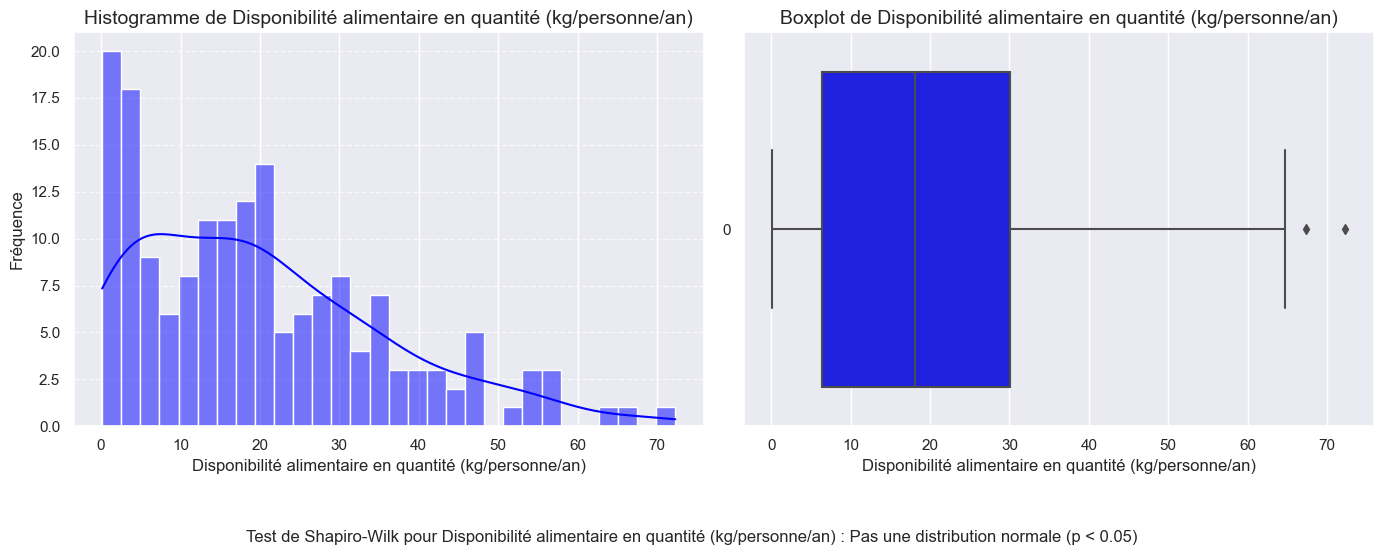

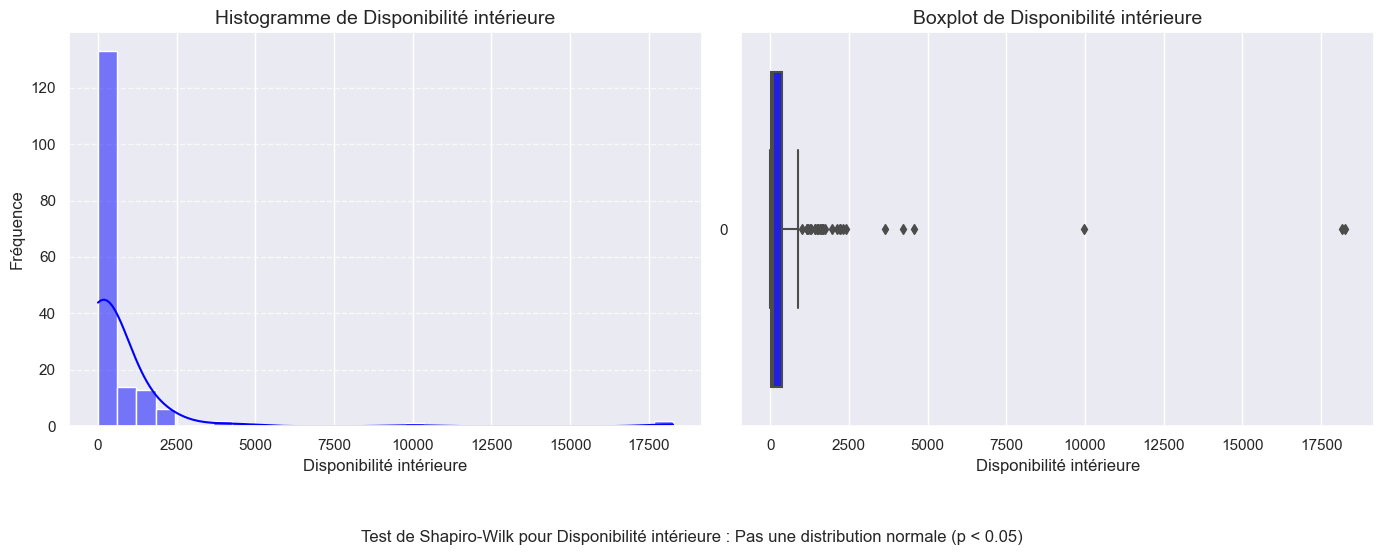

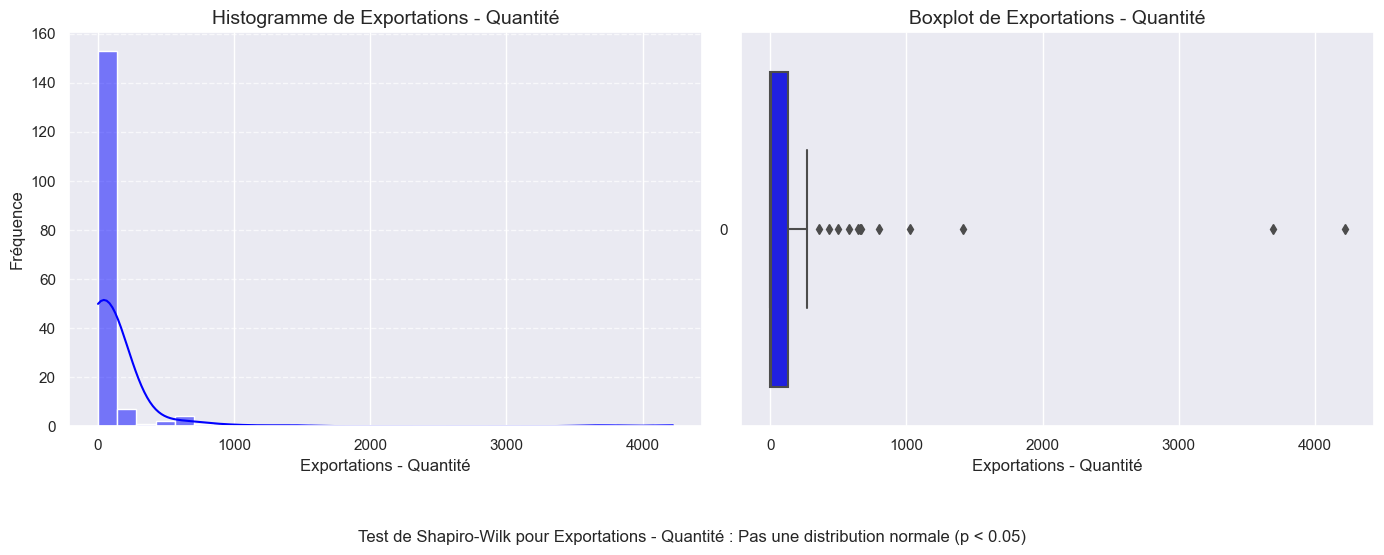

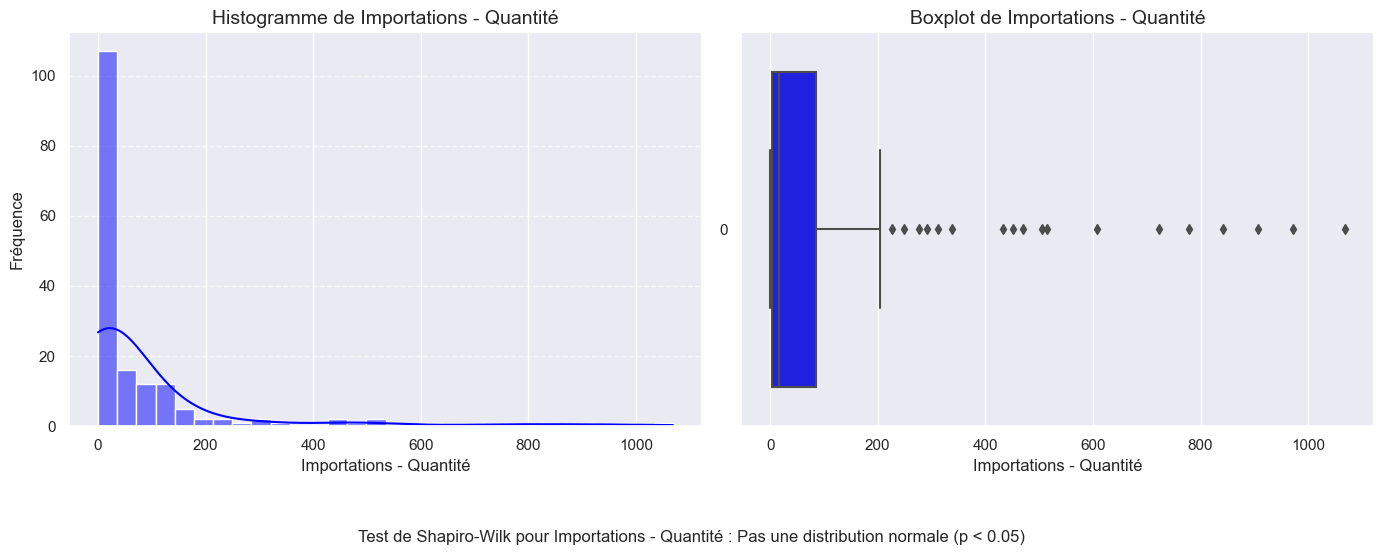

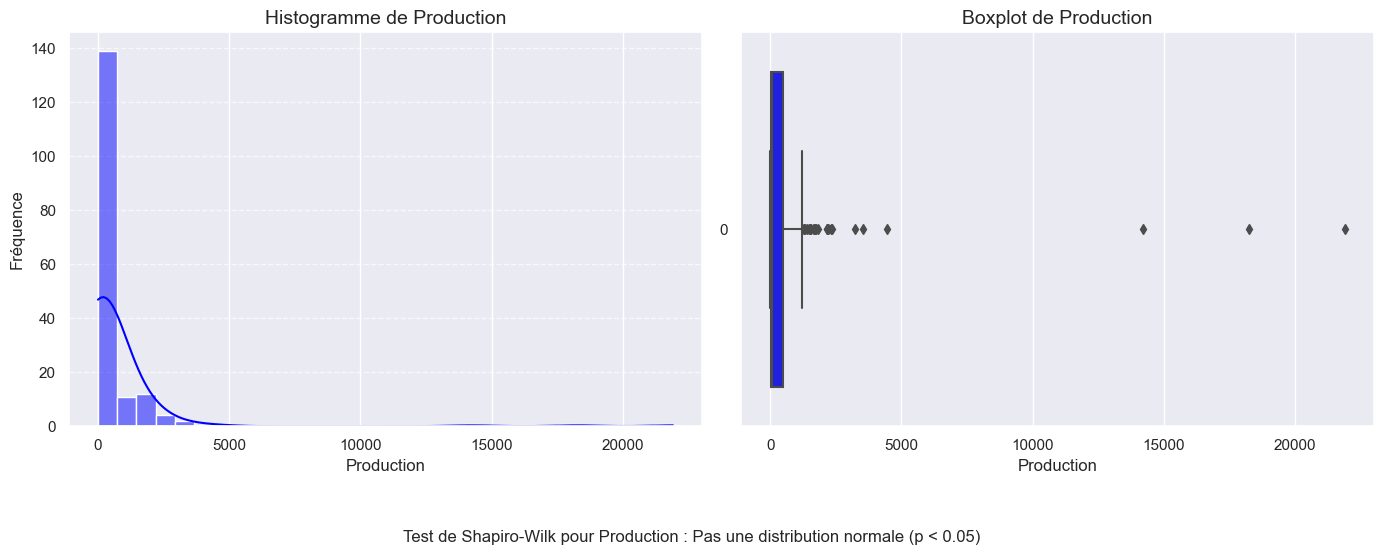

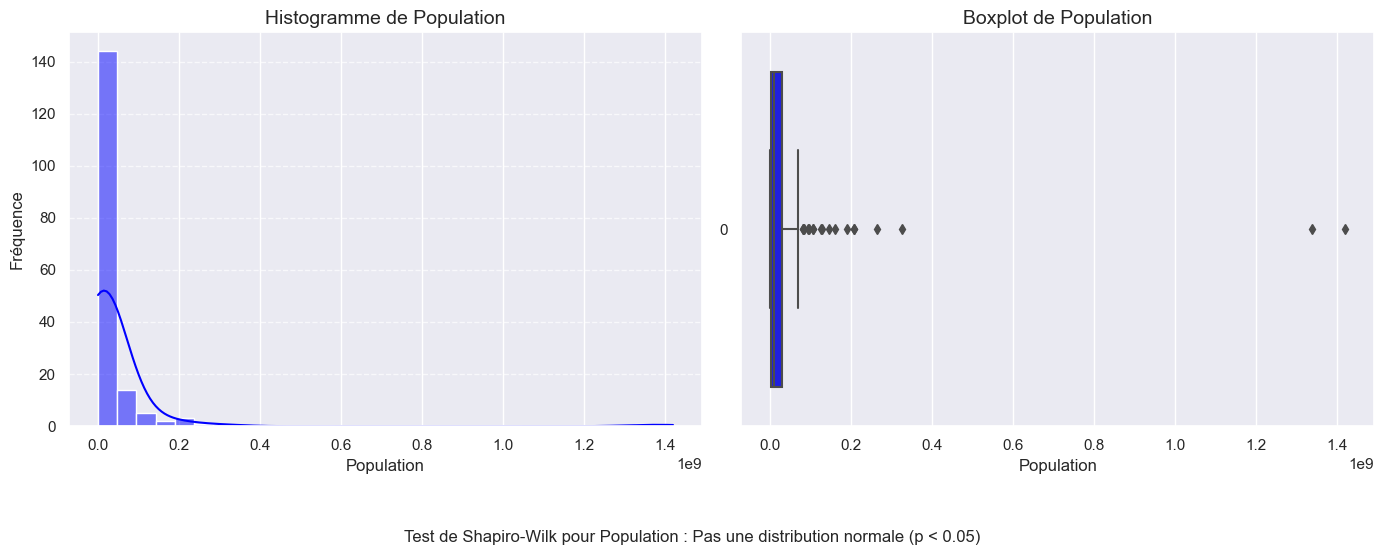

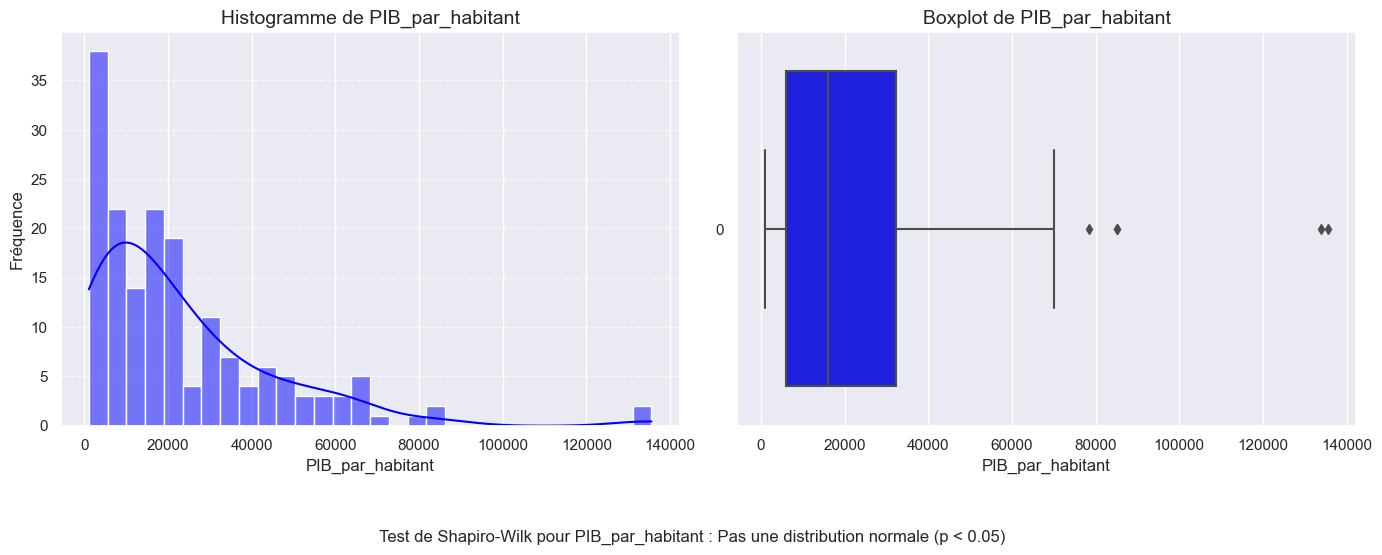

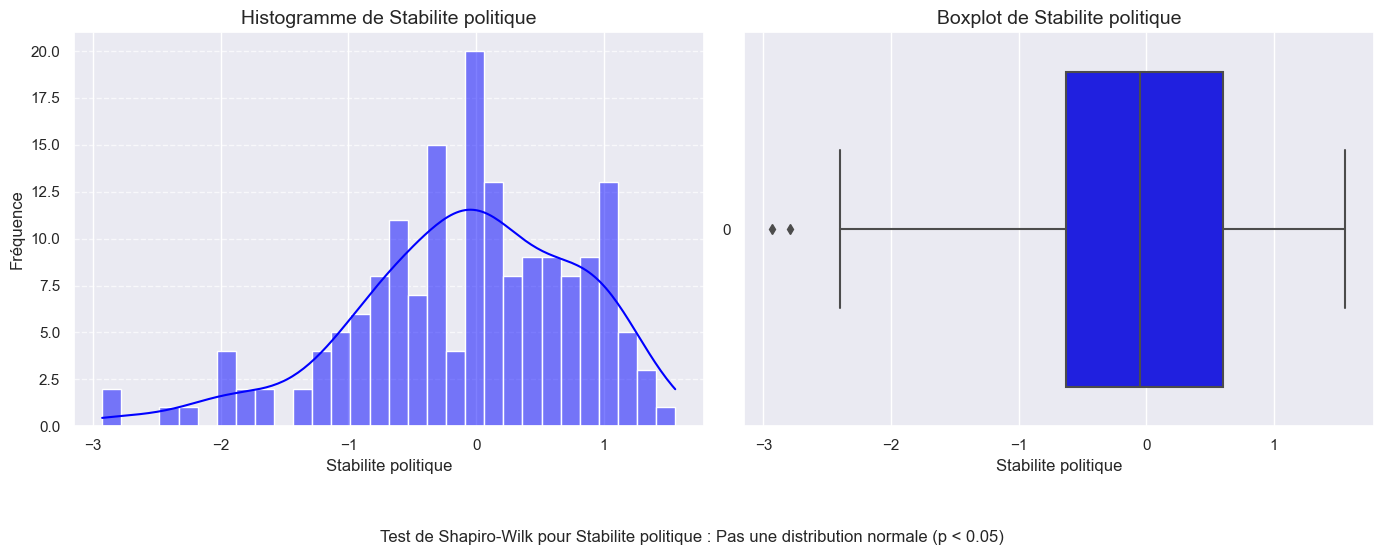

In [24]:
# Liste des colonnes num√©riques √† analyser
numerical_columns = [
    "Disponibilit√© alimentaire en quantit√© (kg/personne/an)",
    "Disponibilit√© int√©rieure",
    "Exportations - Quantit√©",
    "Importations - Quantit√©",
    "Production",
    "Population",
    "PIB_par_habitant",
    "Stabilite politique"
]

# Cr√©ation d'une grille avec histogramme, boxplot, et phrase de normalit√© pour chaque variable
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogramme avec la courbe de densit√©
    sns.histplot(La_poule_qui_chante[column], kde=True, bins=30, color="blue", ax=axes[0])
    axes[0].set_title(f"Histogramme de {column}", fontsize=14)
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel("Fr√©quence", fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Boxplot
    sns.boxplot(La_poule_qui_chante[column], ax=axes[1], color="blue", orient='h')
    axes[1].set_title(f"Boxplot de {column}", fontsize=14)
    axes[1].set_xlabel(column, fontsize=12)
    
    # Test de Shapiro-Wilk
    stat, p_value = shapiro(La_poule_qui_chante[column].dropna())
    if p_value < 0.05:
        normality = "Pas une distribution normale (p < 0.05)"
    else:
        normality = "Suit une distribution normale (p >= 0.05)"
    
    # Ajouter la phrase de normalit√© sous les graphiques
    plt.figtext(0.5, -0.1, f"Test de Shapiro-Wilk pour {column} : {normality}", 
                wrap=True, horizontalalignment='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()


### üìå Quand choisir IQR ou Z-score ?

‚úÖ **Utiliser la m√©thode des interquartiles (IQR) si :**  
- Les **donn√©es ne suivent pas une distribution normale** (asym√©trie, pr√©sence de valeurs extr√™mes).  
- On veut une m√©thode **robuste aux outliers**.  
- On travaille avec des **donn√©es √©conomiques ou des flux commerciaux** (ex. import/export).  

‚úÖ **Utiliser le Z-score si :**  
- Les **donn√©es suivent une distribution normale**.  
- On veut une **m√©thode statistique classique** avec des seuils bas√©s sur la moyenne.  
- On souhaite d√©tecter **des outliers dans des donn√©es centr√©es** (ex. scores de tests, taille/poids de personnes).  

**Dans le cas de mon etude il est plus judiceux et adapt√©s d'utiliser la methode des interquatilles**

## D√©tection et etude des outliers avec la methode des interquatilles

In [25]:
# üìå Application de la m√©thode des interquartiles (IQR) pour l'√©tude des outliers

variables = ["Disponibilit√© alimentaire en quantit√© (kg/personne/an)", "Disponibilit√© int√©rieure",
             "Exportations - Quantit√©", "Importations - Quantit√©", "Production", "PIB_par_habitant"]


# Calcul des quartiles et de l'IQR pour chaque variable
Q1 = La_poule_qui_chante[variables].quantile(0.25)
Q3 = La_poule_qui_chante[variables].quantile(0.75)
IQR = Q3 - Q1

# D√©finition des seuils pour identifier les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers = (La_poule_qui_chante[variables] < lower_bound) | (La_poule_qui_chante[variables] > upper_bound)

# Cr√©ation d'un DataFrame contenant uniquement les valeurs aberrantes d√©tect√©es
outliers_detected = La_poule_qui_chante[outliers.any(axis=1)]

# Nombre total de pays contenant des outliers
nbr_outliers = outliers_detected.shape[0]

# Calcul des valeurs minimales et maximales des outliers par variable
min_values = outliers_detected[variables].min()
max_values = outliers_detected[variables].max()

# üìä R√©sum√© des outliers d√©tect√©s
print(f"üìå Nombre de pays ayant des valeurs aberrantes : {nbr_outliers}\n")

print("üîç Valeurs extr√™mes par variable :")
for var in variables:
    print(f" - {var}: min = {min_values[var]:.2f}, max = {max_values[var]:.2f}")



üìå Nombre de pays ayant des valeurs aberrantes : 45

üîç Valeurs extr√™mes par variable :
 - Disponibilit√© alimentaire en quantit√© (kg/personne/an): min = 2.22, max = 72.31
 - Disponibilit√© int√©rieure: min = 8.00, max = 18266.00
 - Exportations - Quantit√©: min = 0.00, max = 4223.00
 - Importations - Quantit√©: min = 0.00, max = 1069.00
 - Production: min = 0.00, max = 21914.00
 - PIB_par_habitant: min = 5191.90, max = 135547.00


In [26]:
# Comparaison des valeurs extr√™mes avec les statistiques globales
stats_comparaison = pd.DataFrame(columns=["Moyenne", "M√©diane", "Min", "Max"])

for var in variables:
    stats_comparaison.loc[var] = [
        La_poule_qui_chante[var].mean(),
        La_poule_qui_chante[var].median(),
        La_poule_qui_chante[var].min(),
        La_poule_qui_chante[var].max()
    ]

# R√©initialisation temporaire de l'index pour acc√©der √† 'Zone'
La_poule_qui_chante_reset = La_poule_qui_chante.reset_index()

# √âtape 1 : Visualisation des pays avec valeurs extr√™mes par variable
outliers_analysis = {}

for var in variables:
    top_5 = La_poule_qui_chante_reset.nlargest(5, var)[["Zone", var]]
    bottom_5 = La_poule_qui_chante_reset.nsmallest(5, var)[["Zone", var]]
    outliers_analysis[var] = {"Top 5": top_5, "Bottom 5": bottom_5}

# Affichage des pays avec les valeurs les plus √©lev√©es et les plus faibles
for var, data in outliers_analysis.items():
    print(f"\nüîç Pays avec les valeurs les PLUS √âLEV√âES pour {var}:")
    print(data["Top 5"])
    
    print(f"\nüîç Pays avec les valeurs les PLUS FAIBLES pour {var}:")
    print(data["Bottom 5"])



üîç Pays avec les valeurs les PLUS √âLEV√âES pour Disponibilit√© alimentaire en quantit√© (kg/personne/an):
                                Zone  \
134  Saint-Vincent-et-les Grenadines   
72                            Isra√´l   
136                            Samoa   
135                     Sainte-Lucie   
133             Saint-Kitts-et-Nevis   

     Disponibilit√© alimentaire en quantit√© (kg/personne/an)  
134                                              72.31       
72                                               67.39       
136                                              64.77       
135                                              56.69       
133                                              55.77       

üîç Pays avec les valeurs les PLUS FAIBLES pour Disponibilit√© alimentaire en quantit√© (kg/personne/an):
         Zone  Disponibilit√© alimentaire en quantit√© (kg/personne/an)
170  √âthiopie                                               0.13     
149     Tchad          

### üìå Interpr√©tation des r√©sultats de l'√©tude des outliers

#### 1. **Identification des outliers avec la m√©thode des interquartiles (IQR)**
Le calcul des **valeurs aberrantes** sur les variables s√©lectionn√©es a montr√© qu'un **certain nombre de pays** ont des valeurs extr√™mes, que ce soit en termes de production, de consommation alimentaire ou de PIB par habitant. Ces pays sont cat√©goris√©s comme des outliers en raison de leur **forte consommation** ou de **leur forte production**, ce qui peut √™tre justifi√© par des diff√©rences √©conomiques, sociales et commerciales.

Les **USA, Chine, Br√©sil** se distinguent comme des **leaders dans la production, l'exportation et la consommation** de volaille, tandis que des pays comme **le Japon, le Mexique** et **Hong Kong** sont de **grands importateurs** de volaille. D'autre part, certains pays moins d√©velopp√©s ou plus petits (ex : **Tchad, Niger**) pr√©sentent des valeurs tr√®s faibles, tant en termes de consommation alimentaire que de production.

#### 2. **Valeurs extr√™mes par variable**
- **Disponibilit√© alimentaire (kg/personne/an)** : Des **valeurs tr√®s √©lev√©es** pour des pays comme **Isra√´l** ou **Saint-Vincent** et des **valeurs faibles** pour des pays d'Afrique subsaharienne.
- **Disponibilit√© int√©rieure** : Les **USA, Br√©sil, Chine** sont de **gros producteurs**, ce qui justifie leurs chiffres √©lev√©s.
- **Exportations et Importations** : **Les USA et le Br√©sil dominent l‚Äôexportation**, tandis que des pays comme **Japon** et **Mexique** font partie des plus gros importateurs.
- **PIB par habitant** : Des **valeurs extr√™mement √©lev√©es** pour des pays comme **Luxembourg, Irlande**, et des **valeurs plus faibles** pour des pays africains comme **R√©publique Centrafricaine**.

#### 3. **Approche strat√©gique pour le projet**
- **March√©s avec des valeurs extr√™mes √©lev√©es** : Ces pays sont **des cibles cl√©s** pour des produits de qualit√© sup√©rieure ou sp√©cialis√©s. Des pays comme les **USA, Japon, Chine, et Br√©sil** sont de **bons march√©s pour l'exportation**.
- **March√©s avec des valeurs extr√™mes faibles** : Les pays ayant des **valeurs faibles** en termes de consommation alimentaire ou de PIB peuvent √™tre des **march√©s plus difficiles √† p√©n√©trer**, mais peuvent aussi repr√©senter une **opportunit√© pour des produits plus abordables**.

#### 4. **Recommandations** :
- **Focus sur les pays importateurs de volaille** comme le Japon et le Mexique.
- **Cibler des march√©s de niche** dans les pays avec un **pouvoir d'achat √©lev√©** (Luxembourg, Irlande).
- **Anticiper la concurrence des producteurs dominants** (Br√©sil, USA) et chercher √† se diff√©rencier sur la qualit√© ou l'approvisionnement local.

### üìå Prochaine √©tape : **Normalisation des donn√©es**

#### 1. **Pourquoi normaliser les donn√©es ?**
La normalisation des donn√©es est une √©tape essentielle avant de proc√©der √† des analyses comme le **clustering**, surtout quand il y a des **valeurs extr√™mes** qui peuvent fausser les r√©sultats. √âtant donn√© que des variables comme le **PIB par habitant, la production** et **les exportations** peuvent avoir des √©chelles tr√®s diff√©rentes, la **normalisation** permet d'assurer que toutes les variables auront un **poids √©gal** dans l‚Äôanalyse.

**Nous avons d√©cid√© d'appliquer le scaling des donn√©es par standardisation**, une m√©thode qui consiste √† centrer les donn√©es en soustrayant la moyenne de chaque variable, ce qui permet de les recentrer autour de 0, et √† r√©duire leur dispersion en divisant chaque variable par son √©cart-type, afin qu'elles aient une variance √©gale √† 1. Cela permet d'uniformiser l'√©chelle des donn√©es, ce qui est particuli√®rement utile pour les mod√®les sensibles aux √©chelles des variables."

#### Conclusion :
La m√©thode **IQR** nous a permis de bien **comprendre** les disparit√©s entre les pays en termes de production, de consommation et d‚Äôexportation de volaille, et de mieux appr√©hender les **march√©s √† fort potentiel** ainsi que ceux plus complexes. Cela nous guide dans les choix strat√©giques pour l'exportation de volaille, en nous permettant de mieux identifier les **opportunit√©s** et les **obstacles**.


### √Ä l'issue de cette analyse univari√©e, voici certains points cl√©s √† retenir :

1. **Forte variabilit√© des indicateurs entre les pays :**

   - Les variables pr√©sentent une dispersion significative, comme le montrent les coefficients de variation √©lev√©s. Cette variabilit√© illustre les disparit√©s entre les pays en termes de production, exportations, importations, et disponibilit√© alimentaire.

---

2. **Asym√©trie marqu√©e des distributions :**

   - La majorit√© des variables ont une distribution asym√©trique avec des valeurs extr√™mes (outliers). Par exemple, les exportations, les importations, et la production sont domin√©es par quelques pays leaders, tandis que la majorit√© des pays affichent des valeurs nettement inf√©rieures.

---

3. **Pr√©sence de pays leaders :**

   - Certains pays se d√©marquent comme des acteurs majeurs de la production et des exportations alimentaires mondiales. Ils influencent fortement les moyennes globales.

---

4. **Pays vuln√©rables :**

   - Quelques pays montrent une faible disponibilit√© alimentaire par personne, ce qui pourrait indiquer des d√©fis li√©s √† l'ins√©curit√© alimentaire ou √† une production insuffisante pour subvenir aux besoins locaux.

---

5. **Importance des disparit√©s √©conomiques :**

   - Le PIB par habitant r√©v√®le de grandes in√©galit√©s entre les pays, ce qui influence directement leur capacit√© √† produire, importer ou acc√©der √† des ressources alimentaires.

---

6. **Impact de la stabilit√© politique :**

   - Les pays avec une stabilit√© politique faible sont susceptibles d‚Äôavoir des performances r√©duites en mati√®re de production et d‚Äô√©changes alimentaires, affectant ainsi leur s√©curit√© alimentaire.

---

7. **R√¥le des pays tr√®s peupl√©s :**

   - Les pays avec une population tr√®s importante influencent les moyennes globales. Cependant, leur performance relative en termes de disponibilit√© alimentaire par personne peut varier selon leur production ou d√©pendance aux importations.

---

8. **Distribution alimentaire :**

   - Bien que certains pays aient une abondance de ressources, d‚Äôautres semblent d√©pendre fortement des importations pour r√©pondre √† leur demande, refl√©tant un d√©s√©quilibre dans la r√©partition mondiale des ressources.

---

### Synth√®se g√©n√©rale :
L‚Äôanalyse met en √©vidence un syst√®me alimentaire mondial marqu√© par des in√©galit√©s importantes et des d√©pendances entre les pays. Ces r√©sultats sugg√®rent qu‚Äôil serait pertinent d‚Äôexplorer les relations entre les variables, par exemple en √©tudiant les corr√©lations ou en regroupant les pays en clusters selon leurs caract√©ristiques.

### 4.1) Analyse bivari√©

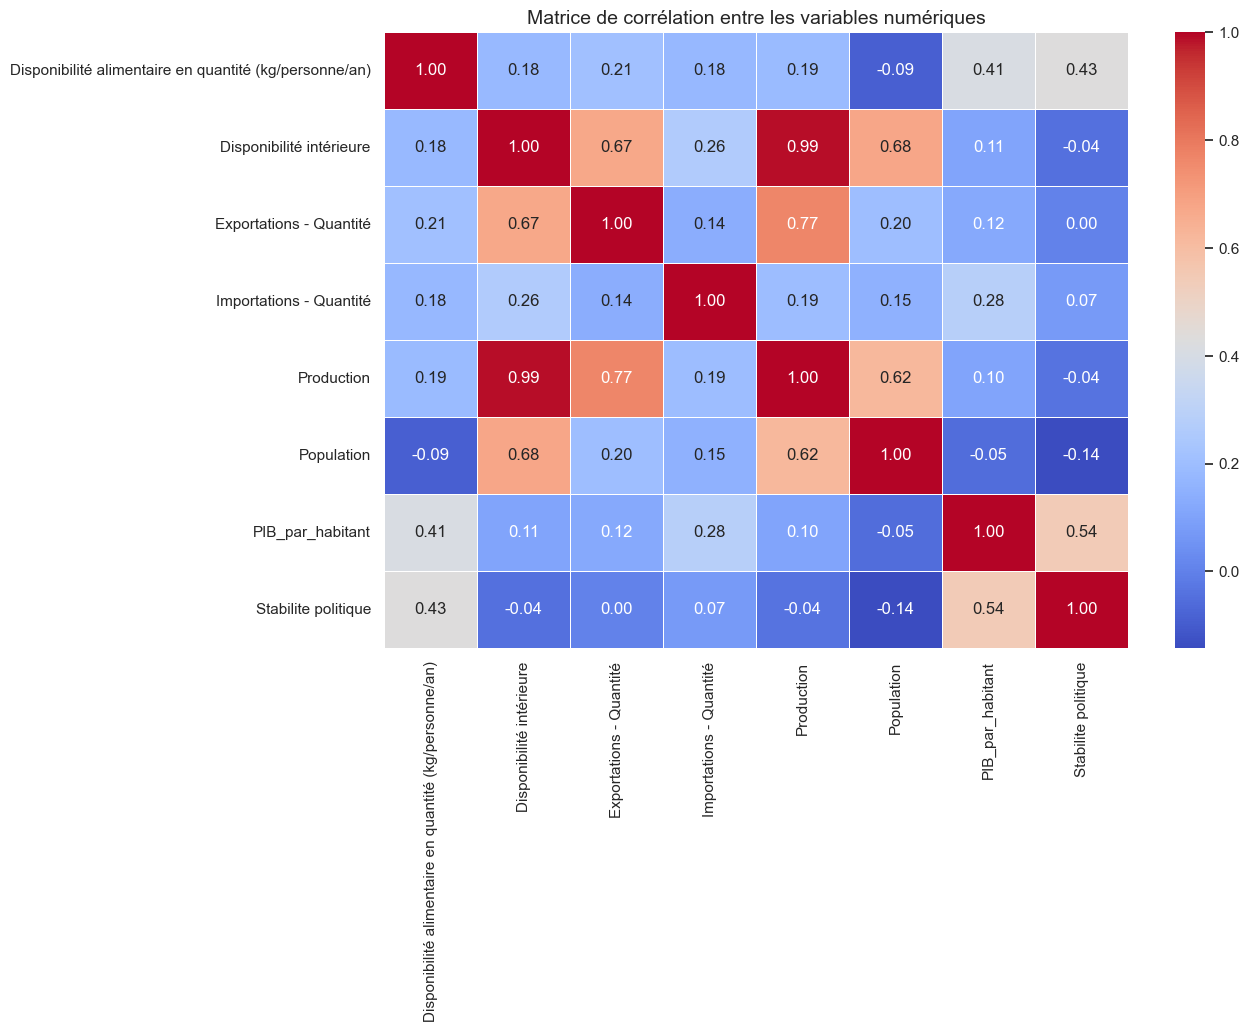

In [27]:
# Matrice de corr√©lation entre les variables num√©riques
correlation_matrix = La_poule_qui_chante[numerical_columns].corr()

# Affichage de la heatmap des corr√©lations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corr√©lation entre les variables num√©riques", fontsize=14)
plt.show()



La matrice de corr√©lation montre des corr√©lations assez fortes entre certaines variables, telles que la production et la disponibilit√© int√©rieure (0.99), ainsi que la production et les exportations (0.77). Cependant, malgr√© ces corr√©lations √©lev√©es, il est important de conserver toutes les variables dans l'analyse, car chacune d'elles apporte des informations distinctes et permet de mieux comprendre les diff√©rents aspects du syst√®me alimentaire mondial. La forte corr√©lation ne justifie pas forc√©ment leur √©limination, car chaque variable peut avoir un r√¥le unique dans l'analyse multivari√©e.

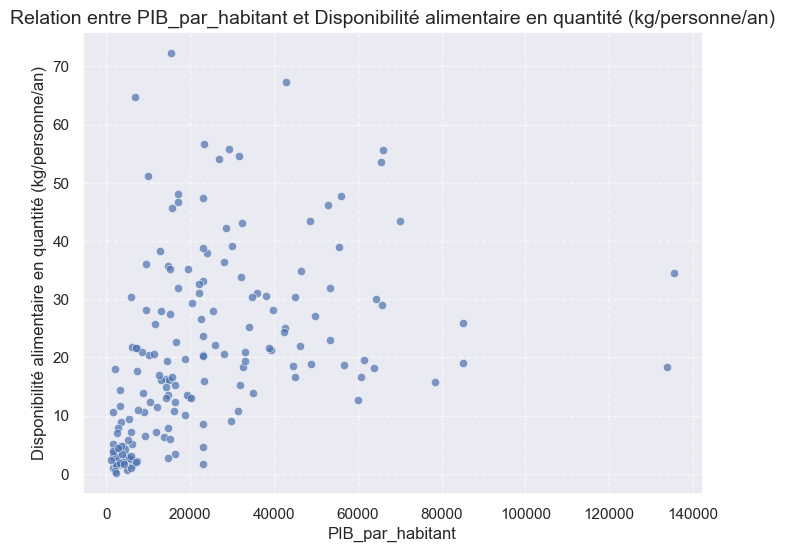

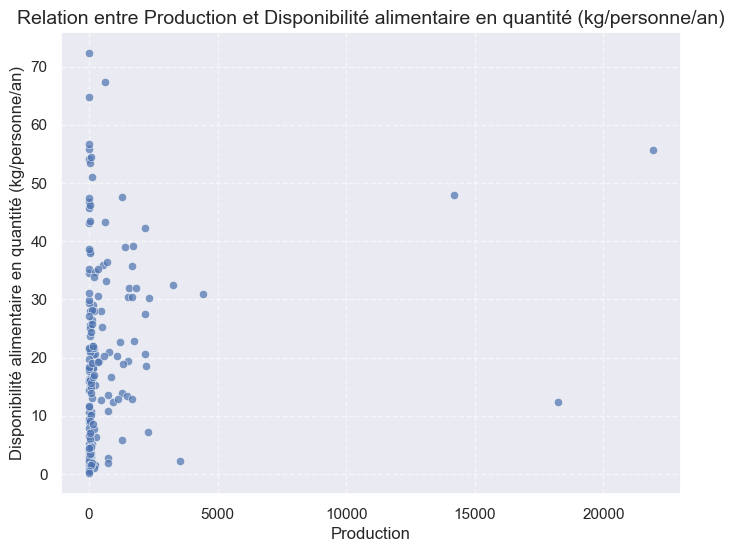

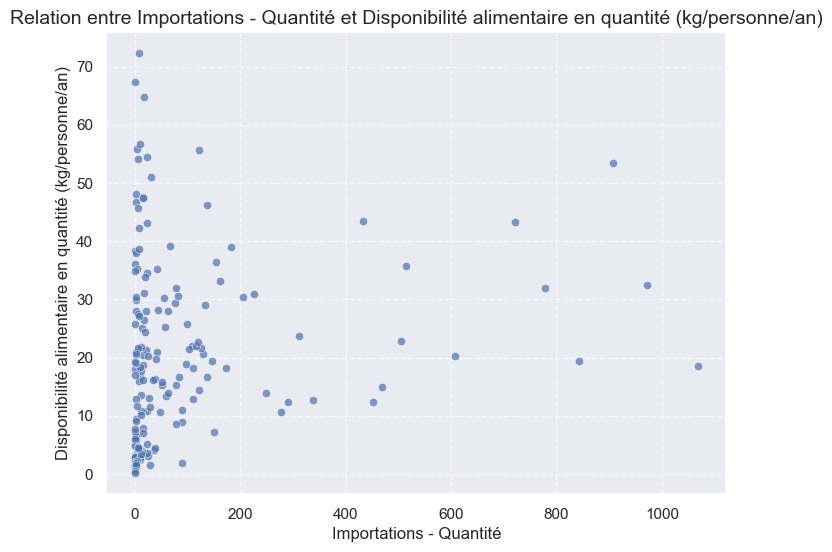

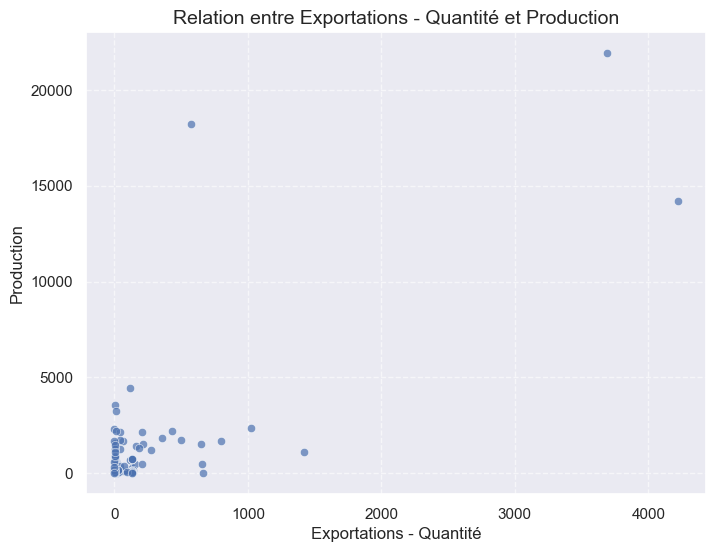

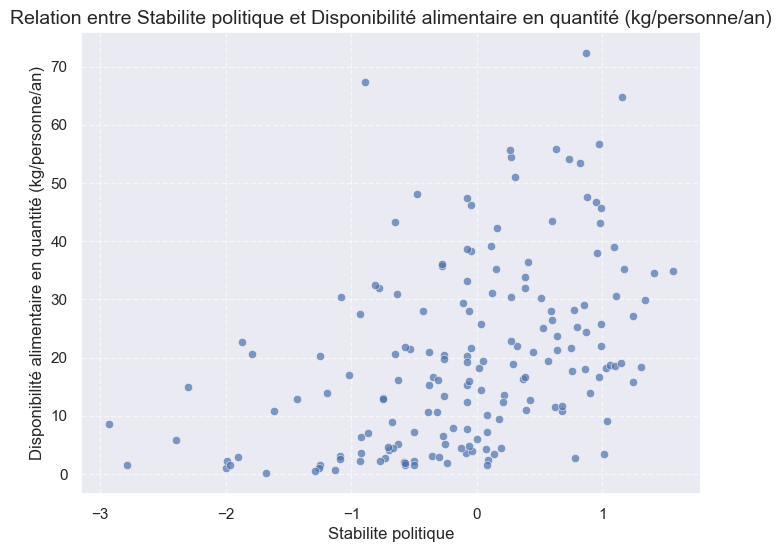

In [28]:
# Analyse de relations entre certaines variables cl√©s avec des scatter plots
selected_pairs = [
    ("PIB_par_habitant", "Disponibilit√© alimentaire en quantit√© (kg/personne/an)"),
    ("Production", "Disponibilit√© alimentaire en quantit√© (kg/personne/an)"),
    ("Importations - Quantit√©", "Disponibilit√© alimentaire en quantit√© (kg/personne/an)"),
    ("Exportations - Quantit√©", "Production"),
    ("Stabilite politique", "Disponibilit√© alimentaire en quantit√© (kg/personne/an)") 
    ]
for x_var, y_var in selected_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=La_poule_qui_chante, x=x_var, y=y_var, alpha=0.7)
    plt.title(f"Relation entre {x_var} et {y_var}", fontsize=14)
    plt.xlabel(x_var, fontsize=12)
    plt.ylabel(y_var, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


### **Interpr√©tation des Corr√©lations Cl√©s pour l‚ÄôExportation de Poulets**

#### * Corr√©lation forte entre production et exportations**
- **Les pays ayant une forte production agricole sont souvent aussi des exportateurs majeurs.**
- **Implication pour l‚Äôexportation de poulets** :  
  ‚Üí Ces pays sont **peu susceptibles d‚Äô√™tre de bons march√©s d‚Äôexportation**, car ils sont **autosuffisants**.

---

#### * Corr√©lation mod√©r√©e entre importations et disponibilit√© alimentaire**
- **Certains pays importent davantage pour combler leur d√©ficit alimentaire.**
- **Implication** :  
  ‚Üí Ces pays sont de **bons candidats pour l‚Äôexportation de volaille**, s‚Äôils **importent d√©j√† des prot√©ines animales**.

---

#### * Corr√©lation mod√©r√©e entre PIB par habitant et disponibilit√© alimentaire**
- **Plus un pays est riche, plus sa disponibilit√© alimentaire est √©lev√©e, mais ce n‚Äôest pas syst√©matique.**
- **Implication** :  
  ‚Üí Certains pays √† **fort PIB** peuvent **encore avoir une demande en importation de volaille**, notamment si leur production locale est insuffisante.
  
#### * Corr√©lation mod√©r√©e entre Stabilite politique et disponibilit√© alimentaire**  
- **Les pays politiquement stables ont g√©n√©ralement une meilleure disponibilit√© alimentaire, ce qui en fait des march√©s plus s√ªrs pour l‚Äôexportation de poulets. En revanche, les pays instables, bien que parfois d√©pendants des importations, pr√©sentent des risques commerciaux li√©s aux infrastructures, aux r√©glementations et √† la logistique.**


In [29]:
#Export du dataframe La_poule_qui_chante en fichier csv
La_poule_qui_chante.to_csv('La_poule_qui_chante.csv', index=True)

Nous passons maintenant au second notebook.